In [198]:
import numpy as np
import matplotlib
from random import seed, shuffle, uniform
from math import ceil, sqrt
from functools import reduce

import os

# if running just for output don't halt to show plots
# plots will be saved in images folder
if __name__ == '__main__':
    matplotlib.use('Agg')
    no_interact = True
import matplotlib.pyplot as plt

IMG_FOLDER = "images/"
if not os.path.exists(IMG_FOLDER):
    os.makedirs(IMG_FOLDER)

In [199]:
def sigmoid(X, Theta):
    
    return 1/(1+np.exp(-X@Theta))
def cost(guess, actual):
    with np.errstate(divide='ignore'):
        return 1/(guess.shape[0]) * np.sum(actual.T@np.log(guess) + (1-actual).T@np.log(1-guess))
def logistic_regression(X, Y, iterations=10000, learning_rate=.01):
    seed(0)
    
    Theta = np.array([uniform(-1,1) for _ in range(X.shape[1])]).T
    
    loss = []
    for i in range(iterations):
        # compute cost
        loss.append(-cost(sigmoid(X,Theta),Y))
    
        # If the abosulte value of the change in the loss
        # on the training data is less than 2^-23
        # skip the first iteration's check
        if(i > 0 and (np.isnan(loss[i]) or np.abs(loss[i] - loss[i-1]) < 2**-23)):
            break
    
        # Compute the gradient (partial l)/(partial theta)
        dl_dt = (learning_rate/X.shape[0]) * X.T@(Y - sigmoid(X, Theta))
    
        Theta += dl_dt
        
    return {"theta": Theta,
            "iterations": i + 1,
            "loss": loss}

def get_stats(guess, actual, threshold=.5):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(guess)):
        if(guess.item(i) > threshold):
            if(test_y.item(i) == 1):
                TP += 1
            else:
                FP += 1
        else:
            if(test_y.item(i) == 0):
                TN += 1
            else:
                FN += 1

    precision = TP/(TP+FP)
    recall = TP/(TP + FN)
    f_measure = (2*precision*recall)/(precision+recall)
    accuracy = 1/(TP+FP+TN+FN)*(TP+TN)
    return {"precision": precision,
            "recall": recall,
            "f-measure": f_measure,
            "accuracy": accuracy}

# Problem 2

In [200]:
from sklearn.datasets import load_iris
print("------------------\nProblem 2\n------------------\n")
iris = load_iris()
X_nonstandard = np.array(iris.data[:, :2])
Y = np.array((iris.target != 0) * 1).T

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0)
X_nob  = (X_nonstandard - X_mean)/X_std
    
X = np.insert(X_nob, 0, 1,axis=1)

results = logistic_regression(X, Y, iterations=10000, learning_rate=.01)
Theta = results["theta"]

print("My implementation\n------------")
print("Iterations: {}".format(results["iterations"]))
for i in range(Theta.shape[0]):
    print("Theta_{}: {}".format(i, Theta.item(i)))
print("Final loss delta: {}".format(np.abs(results["loss"][-1] - results["loss"][-2])))
print("Line: y = {}x + {}".format(Theta.item(1)/-Theta.item(2), Theta.item(0)/-Theta.item(2)))

------------------
Problem 2
------------------

My implementation
------------
Iterations: 10000
Theta_0: 2.1680680579887635
Theta_1: 3.8023159585445083
Theta_2: -2.5665004964170794
Final loss delta: 2.449116088036607e-06
Line: y = 1.4815177179403116x + 0.8447565317113552


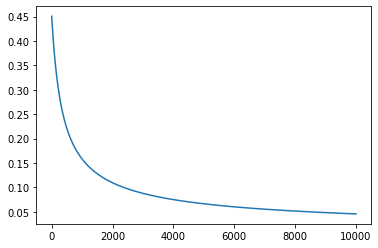

In [201]:
fig = plt.figure()
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,1], X[:,2], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="equal", xlim=(-2, 3.5), ylim=(-2, 3.5))
xs = np.array([-2,2.5])
ys = Thetays = Theta.item(1)/-Theta.item(2) * xs +Theta.item(0)/-Theta.item(2)
ax.plot(xs, ys)

plt.savefig(IMG_FOLDER + "Q2-threshold.png")
if(not no_interact):
    plt.show()
plt.close()
plt.plot(range(len(results["loss"])), results["loss"])
plt.savefig(IMG_FOLDER + "Q2-cost-vs-iterations.png")
if(not no_interact):
    plt.show()

Sklearn's implementation
------------
Theta_0: 47.81414622348973
Theta_1: 67.26895117169423
Theta_2: -30.035073039983903
Line: y = 2.239679959564043x + 1.5919437305791668


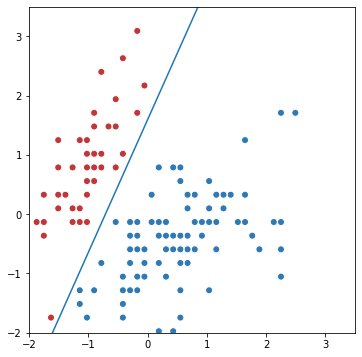

In [202]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)
lgr.fit(X[:,1:],Y)
print("Sklearn's implementation\n------------")
print("Theta_0: {}\nTheta_1: {}\nTheta_2: {}".format(lgr.intercept_[0], lgr.coef_.item(0),lgr.coef_.item(1)))
print("Line: y = {}x + {}".format(lgr.coef_.item(0)/-lgr.coef_.item(1), lgr.intercept_[0]/-lgr.coef_.item(1)))
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,1], X[:,2], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="equal", xlim=(-2, 3.5), ylim=(-2, 3.5))

xs = np.array([-2,2.5])
ys = Thetays = lgr.coef_.item(0)/-lgr.coef_.item(1) * xs + lgr.intercept_[0]/-lgr.coef_.item(1)
ax.plot(xs, ys)


plt.savefig(IMG_FOLDER + "Q2-built-in-threshold.png")
if(not no_interact):
    plt.show()

# Problem 3

In [193]:
print("------------------\nProblem 3\n------------------\n")
data = []
with open("spambase(1).data", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.array(line.split(","), dtype="float32"))
        
data = np.array(data)
seed(0)
shuffle(data)
X_nonstandard = data[:-1, :]

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0, ddof=1)
X_nob  = (X_nonstandard - X_mean)/X_std
    
X = np.insert(X_nob, 0, 1,axis=1)

split_location = ceil(data.shape[0]*2/3)
training_x = X[0:split_location, :]
test_x = X[split_location:, :]

training_y = data[0:split_location, -1]
test_y = data[split_location:, -1]

results = logistic_regression(training_x, training_y, iterations=1500, learning_rate=.01)

Theta = results["theta"]

guess = sigmoid(test_x, Theta)

------------------
Problem 3
------------------



Threshold: .5
{'precision': 0.9006928406466512, 'recall': 0.9923664122137404, 'f-measure': 0.9443099273607747, 'accuracy': 0.9399477806788512}
Threshold: .6
{'precision': 0.9130434782608695, 'recall': 0.9885496183206107, 'f-measure': 0.9492974954184484, 'accuracy': 0.945822454308094}


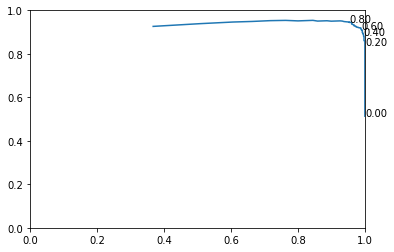

In [194]:
stats = get_stats(guess, test_y, threshold=.5)
print("Threshold: .5\n{}".format(stats))
thresholds = np.linspace(0,.99,100)
precisions = []
recalls    = []
for t in thresholds:
    s = get_stats(guess, test_y, threshold=t)
    precisions.append(s["precision"])
    recalls.append(s["recall"])
    
plt.ylim((0,1))
plt.xlim((0,1))
plt.plot(recalls, precisions)
for i in range(0, len(thresholds), 20):
    plt.text(recalls[i],precisions[i], "{:.02f}".format(thresholds[i]))
stats = get_stats(guess, test_y, threshold=.60)
print("Threshold: .6\n{}".format(stats))
    
plt.savefig(IMG_FOLDER + "Q3-precision-vs-recall.png")
if(not no_interact):
    plt.show()

# Problem 4

In [195]:
print("------------------\nProblem 4\n------------------\n")
data = []
with open("spambase(1).data", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.array(line.split(","), dtype="float32"))
        
data = np.array(data)
seed(0)
shuffle(data)

X_nonstandard = data[:-1, :]

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0, ddof=1)
X_nob  = (X_nonstandard - X_mean)/X_std
    
split_location = ceil(data.shape[0]*2/3)
training_x = X[0:split_location, :]
test_x = X[split_location:, :]

    
training_y = data[:split_location, -1]
test_y = data[split_location:, -1]



training_x_true  = training_x[training_y == 1, :]
training_x_false = training_x[training_y == 0, :]

------------------
Problem 4
------------------



In [196]:
prob_true    = training_x_true.shape[0] / training_x.shape[0]
means_true   = []
stdevs_true  = []
prob_false   = 1 - prob_true
means_false  = []
stdevs_false = []

for i in range(training_x.shape[1]):
    means_true.append(np.mean(training_x_true[:,i]))
    stdevs_true.append(np.std(training_x_true[:,i], ddof=1))
    means_false.append(np.mean(training_x_false[:,i]))
    stdevs_false.append(np.std(training_x_false[:,i], ddof=1))
    
means_true   = np.array(means_true)
stdevs_true  = np.array(stdevs_true)
means_false  = np.array(means_false)
stdevs_false = np.array(stdevs_false)
predictions = [] 

def gaussian(mean, stdev, x):
    return 1/(stdev*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*stdev**2))
    
with np.errstate(divide='ignore'):
    # if stdevs are zero then the feature is always a certain value for a class
    # messes with divisions so set so epsilon
    stdevs_true[stdevs_true==0] = 2**-23
    stdevs_false[stdevs_false==0] = 2**-23
    for i in range(test_x.shape[0]):
        guess_true  = gaussian(means_true, stdevs_true, test_x[i,:])
        guess_true = prob_true * np.product(guess_true)
        
        guess_false = gaussian(means_false, stdevs_false, test_x[i,:])
        guess_false = prob_false * np.product(guess_false)
        if(guess_true>guess_false):
            predictions.append(1)
        else:
            predictions.append(0)
predictions = np.array(predictions)
stats = get_stats(predictions,test_y) 
print(stats)

{'precision': 1.0, 'recall': 0.955470737913486, 'f-measure': 0.9772283669486013, 'accuracy': 0.9771540469973891}
